In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt

In [2]:
# Create a path to csv and read it in pandas dataframe
path=Path("Resources/movies_metadata.csv")
movies_df=pd.read_csv(path)
movies_df.head()

/var/folders/9h/2vp4v64n0ybf9nqkzl8tzhx40000gn/T/ipykernel_28751/1573341711.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df=pd.read_csv(path)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
#Total no of columns in dataset in 24
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
movies_df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [6]:
reduced_movies_df = movies_df.loc[:, ["title","genres","overview"]]
reduced_movies_df

,title,genres,overview
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...
...,...,...,...
45461,Subdue,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Rising and falling between a man and woman.
45462,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",An artist struggles to finish his work while a...
45463,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","When one of her hits goes wrong, a professiona..."
45464,Satan Triumphant,[],"In a small town live two brothers, one a minis..."


In [7]:
# Identify incomplete rows
reduced_movies_df.count()

title       45460
genres      45466
overview    44512
dtype: int64

In [8]:
# Drop all rows with missing information
reduced_movies_df = reduced_movies_df.dropna(how='any')

In [9]:
# Verify dropped rows
reduced_movies_df.count()

title       44506
genres      44506
overview    44506
dtype: int64

In [10]:
reduced_movies_df.dtypes


title       object
genres      object
overview    object
dtype: object

In [11]:
reduced_movies_df["genres"]
reduced_movies_df=reduced_movies_df.copy()

In [12]:
# Function to extract the first genre name
def extract_first_genre(genre_str):
    pattern = re.compile(r"'name': '([^']*)'")
    matches = pattern.findall(genre_str)
    return matches[0] if matches else None

In [13]:
# Apply the function to the DataFrame
reduced_movies_df['extracted_genres'] = reduced_movies_df['genres'].apply(extract_first_genre)

print(reduced_movies_df['extracted_genres'])

0        Animation
1        Adventure
2          Romance
3           Comedy
4           Comedy
           ...    
45461        Drama
45462        Drama
45463       Action
45464         None
45465         None
Name: extracted_genres, Length: 44506, dtype: object


In [14]:
# Now, drop the 'genres' column from the DataFrame
reduced_movies_df = reduced_movies_df.drop(columns=['genres', 'overview'])
reduced_movies_df

,title,extracted_genres
0,Toy Story,Animation
1,Jumanji,Adventure
2,Grumpier Old Men,Romance
3,Waiting to Exhale,Comedy
4,Father of the Bride Part II,Comedy
...,...,...
45461,Subdue,Drama
45462,Century of Birthing,Drama
45463,Betrayal,Action
45464,Satan Triumphant,None


In [15]:

# Identify incomplete rows
reduced_movies_df.count()

title               44506
extracted_genres    42321
dtype: int64

In [16]:
# Drop all rows with missing information
reduced_movies_df = reduced_movies_df.dropna(how='any')

In [17]:
# Verify dropped rows
reduced_movies_df.count()

title               42321
extracted_genres    42321
dtype: int64

In [18]:
# Count unique values in 'extracted_genres' column
genre_counts = reduced_movies_df['extracted_genres'].value_counts()

# Display the count of unique genres
print(genre_counts)

Drama              11804
Comedy              8517
Action              4464
Documentary         3376
Horror              2612
Crime               1663
Thriller            1646
Adventure           1502
Romance             1163
Animation           1113
Fantasy              696
Science Fiction      639
Mystery              547
Family               508
Music                480
Western              449
TV Movie             380
War                  373
History              273
Foreign              116
Name: extracted_genres, dtype: int64


Text(0.5, 0, 'Genre')

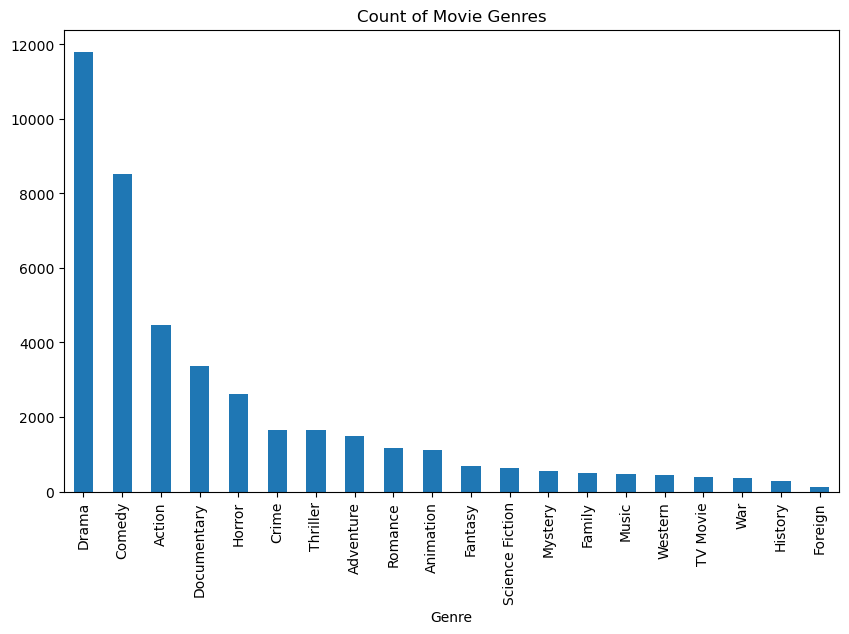

In [19]:
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size as needed
genre_counts.plot(kind='bar')
plt.title('Count of Movie Genres')
plt.xlabel('Genre')

In [21]:
# Save the DataFrame to a CSV file. 
reduced_movies_df.to_csv("Resources/movies_cleaned.csv", index=False)